## Linear Regression
#### Description : 
- Linear regression is a basic and commonly used type of predictive analysis.  The overall idea of regression is to examine two things: 
  - (1) does a set of predictor variables do a good job in predicting an outcome (dependent) variable?  
  - (2) Which variables in particular are significant predictors of the outcome variable, and in what way do they–indicated by the magnitude and sign of the beta estimates–impact the outcome variable?  
- These regression estimates are used to explain the relationship between one dependent variable and one or more independent variables. 

#### Simple linear regression equation: y =  θ0 +θ1x1 +e
#### Multilinear regression equation: y =  θ0 +θ1x1 +θ2x2 +⋯+θnxn +e
- ŷ is the predicted value.
- n is the number of features.
- xi is the ith feature value.
- θj is the jth model parameter (including the bias term θ0 and the feature weights θ1, θ2, ⋯, θn).
- ej is Random error value for this xj

#### Refer my blog
[here](https://www.vaishalilambe.com)

### Vectorized form
#### Equation y = hθ x = θT · x
- θ is the model’s parameter vector, containing the bias term θ0 and the feature weights θ1 to θn.
- θT is the transpose of θ (a row vector instead of a column vector).
- x is the instance’s feature vector, containing x0 to xn, with x0 always equal to 1.
- θT · x is the dot product of θT and x.
- hθ is the hypothesis function, using the model parameters θ.

#### Let’s generate some linear-looking data to test this equation on

In [24]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Now let’s compute θ using the Normal Equation. We will use the inv() function from NumPy’s Linear Algebra module (np.linalg) to compute the inverse of a matrix, and the dot() method for matrix multiplication:

In [25]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [26]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance 
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.83404663],
       [10.20802511]])

#### Let’s plot this model’s predictions 

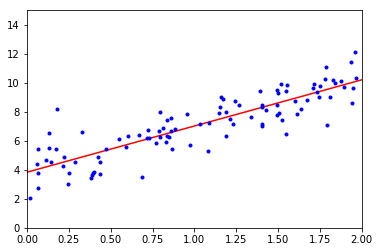

In [27]:
import matplotlib.pyplot as plt
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

#### The equivalent code using Scikit-Learn looks like

In [5]:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)

array([[ 3.91901791],
       [10.34375787]])

### Lets use same wine data and do linear regression model

In [6]:
import pandas as pd
df=pd.read_csv('wine.data.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
df.columns = [  'name'
                ,'alcohol'
             	,'malicAcid'
             	,'ash'
            	,'ashalcalinity'
             	,'magnesium'
            	,'totalPhenols'
             	,'flavanoids'
             	,'nonFlavanoidPhenols'
             	,'proanthocyanins'
            	,'colorIntensity'
             	,'hue'
             	,'od280_od315'
             	,'proline'
                ]

df.head()

,name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
#Check for null values
df.isnull().sum()

name                   0
alcohol                0
malicAcid              0
ash                    0
ashalcalinity          0
magnesium              0
totalPhenols           0
flavanoids             0
nonFlavanoidPhenols    0
proanthocyanins        0
colorIntensity         0
hue                    0
od280_od315            0
proline                0
dtype: int64

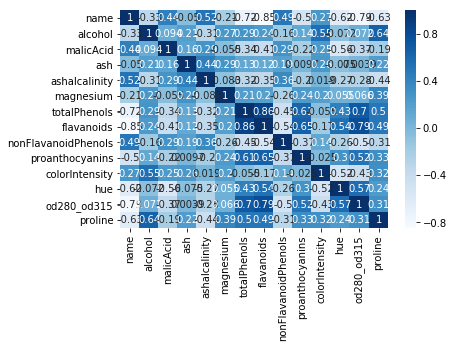

In [9]:
import seaborn as sns
# find correlation of all columns
corr = df[df.columns].corr()
sns.heatmap(corr, cmap="Blues", annot = True)

In [10]:
# as ash column varibal ehas lowest correlation we can drop it
X= df.drop(['name','ash'], axis=1)

X.head()

,alcohol,malicAcid,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,14.23,1.71,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [11]:
Y=df.iloc[:,:1]
Y.head()

,name
0,1
1,1
2,1
3,1
4,1


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

print(X_train.shape)
print(X_test.shape)

(124, 12)
(54, 12)


In [13]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, Y_train)
y_pred = linear_reg.predict(X_test)
print(y_pred [:5])

[[1.11902449]
 [3.08055562]
 [1.92745016]
 [1.53041388]
 [1.92320481]]


#### Scoring Model
- A common method of measuring the accuracy of regression models is to use the R2statistic.
- The R ^2 statistic is defined as follows:
         R ^2 =1–(RSS/TSS)

- The RSS (Residual sum of squares) measures the variability left unexplained after performing the regression
- The TSS measues the total variance in Y
- Therefore the R ^2
- R ^2 statistic measures proportion of variability in Y that is explained by X using our model
- R ^2 can be determined using our test set and the model’s score method.

In [14]:
from sklearn.metrics import r2_score
r2_4 = r2_score(Y_test, y_pred)
print ("r2_score is: " , r2_4)

r2_score is:  0.841191275812028


In [15]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, linear_reg.coef_[0][idx]))

The coefficient for alcohol is -0.06932060996217346
The coefficient for malicAcid is 0.015750017156533853
The coefficient for ashalcalinity is 0.03167636466525904
The coefficient for magnesium is -0.0005818835456246157
The coefficient for totalPhenols is 0.24836825993816217
The coefficient for flavanoids is -0.48977399256487536
The coefficient for nonFlavanoidPhenols is -0.4416409579440424
The coefficient for proanthocyanins is 0.11047250972944624
The coefficient for colorIntensity is 0.05259661730555649
The coefficient for hue is -0.12327203802892221
The coefficient for od280_od315 is -0.3107701012490099
The coefficient for proline is -0.0007306244840799349


In [16]:
intercept =linear_reg.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 3.8573695975990026


In [17]:
from sklearn.metrics import mean_squared_error

y_predict = linear_reg.predict(X_test)

linear_reg_mse = mean_squared_error(y_predict, Y_test)

print ("Mean Sqaure Error: ", linear_reg_mse)

Mean Sqaure Error:  0.09214827205968744


In [18]:
import math

math.sqrt(linear_reg_mse)

0.30355933861386547

## Predicting stock market using Linear Regression 
[reference](https://www.kaggle.com/dkmostafa/predicting-stock-market-using-linear-regression)


In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn import preprocessing;
from sklearn import cross_validation;
from sklearn import linear_model;

/Users/vaishalilambe/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
def prepare_data(df,forecast_col,forecast_out,test_size):
    label = df[forecast_col].shift(-forecast_out);#creating new column called label with the last 5 rows are nan
    X = np.array(df[[forecast_col]]); #creating the feature array
    X = preprocessing.scale(X) #processing the feature array
    X_lately = X[-forecast_out:] #creating the column i want to use later in the predicting method
    X = X[:-forecast_out] # X that will contain the training and testing
    label.dropna(inplace=True); #dropping na values
    y = np.array(label)  # assigning Y
    X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, y, test_size=test_size) #cross validation 

    response = [X_train,X_test , Y_train, Y_test , X_lately];
    return response;

In [21]:
df = pd.read_csv("prices.csv") #loading the csv file
df=df[df.symbol=='GOOG']#choosing stock symbol


In [22]:
forecast_col = 'close'#choosing which column to forecast
forecast_out = 5 #how far to forecast 
test_size = 0.2; #the size of my test set

X_train, X_test, Y_train, Y_test , X_lately =prepare_data(df,forecast_col,forecast_out,test_size); #calling the method were the cross validation and data preperation is in

learner = linear_model.LinearRegression(); #initializing linear regression model

learner.fit(X_train,Y_train); #training the linear regression model
score=learner.score(X_test,Y_test);#testing the linear regression model

forecast= learner.predict(X_lately); #set that will contain the forecasted data

response={};#creting json object
response['test_score']=score; 
response['forecast_set']=forecast;

print(response);

{'test_score': 0.9812452342099616, 'forecast_set': array([785.24731797, 786.82509343, 780.57177226, 778.39753097,
       767.84387683])}


#### Advantages: 
- Linear regression is an extremely simple method. It is very easy and intuitive to use and understand. A person with only the knowledge of high school mathematics can understand and use it. 
- In addition, it works in most of the cases. Even when it doesn’t fit the data exactly, we can use it to find the nature of the relationship between the two variables.

#### Disadvantage:

- By its definition, linear regression only models relationships between dependent and independent variables that are linear. It assumes there is a straight-line relationship between them which is incorrect sometimes. Linear regression is very sensitive to the anomalies in the data (or outliers).
- Take for example most of your data lies in the range 0-10. If due to any reason only one of the data item comes out of the range, say for example 15, this significantly influences the regression coefficients.
- Another disadvantage is that if we have a number of parameters than the number of samples available then the model starts to model the noise rather than the relationship between the variables.
[Reference](https://www.quora.com/What-are-the-advantages-and-disadvantages-of-linear-regression)